In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

print("Successfully Loaded")

Successfully Loaded


In [2]:
data = pd.read_csv("train.csv")

In [3]:
data

,Date,Views
0,01/06/2021,7831
1,02/06/2021,7798
2,03/06/2021,7401
3,04/06/2021,7054
4,05/06/2021,7973
...,...,...
386,22/06/2022,11154
387,23/06/2022,10382
388,24/06/2022,9555
389,25/06/2022,8502


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 391 entries, 0 to 390
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    391 non-null    object
 1   Views   391 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 6.2+ KB


In [5]:
data.describe()

,Views
count,391.000000
mean,8482.606138
std,1279.661279
min,4478.000000
25%,7603.000000
50%,8363.000000
75%,9304.000000
max,12156.000000


In [6]:
data.isnull().any()

Date     False
Views    False
dtype: bool

In [7]:
data["Date"] = pd.to_datetime(data["Date"],
                         format="%d/%m/%Y")

In [8]:
data.sample(10)

,Date,Views
141,2021-10-20,9416
284,2022-03-12,7762
102,2021-09-11,8172
136,2021-10-15,6743
286,2022-03-14,10533
362,2022-05-29,8498
346,2022-05-13,9543
302,2022-03-30,9960
322,2022-04-19,12156
228,2022-01-15,6314


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 391 entries, 0 to 390
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    391 non-null    datetime64[ns]
 1   Views   391 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 6.2 KB


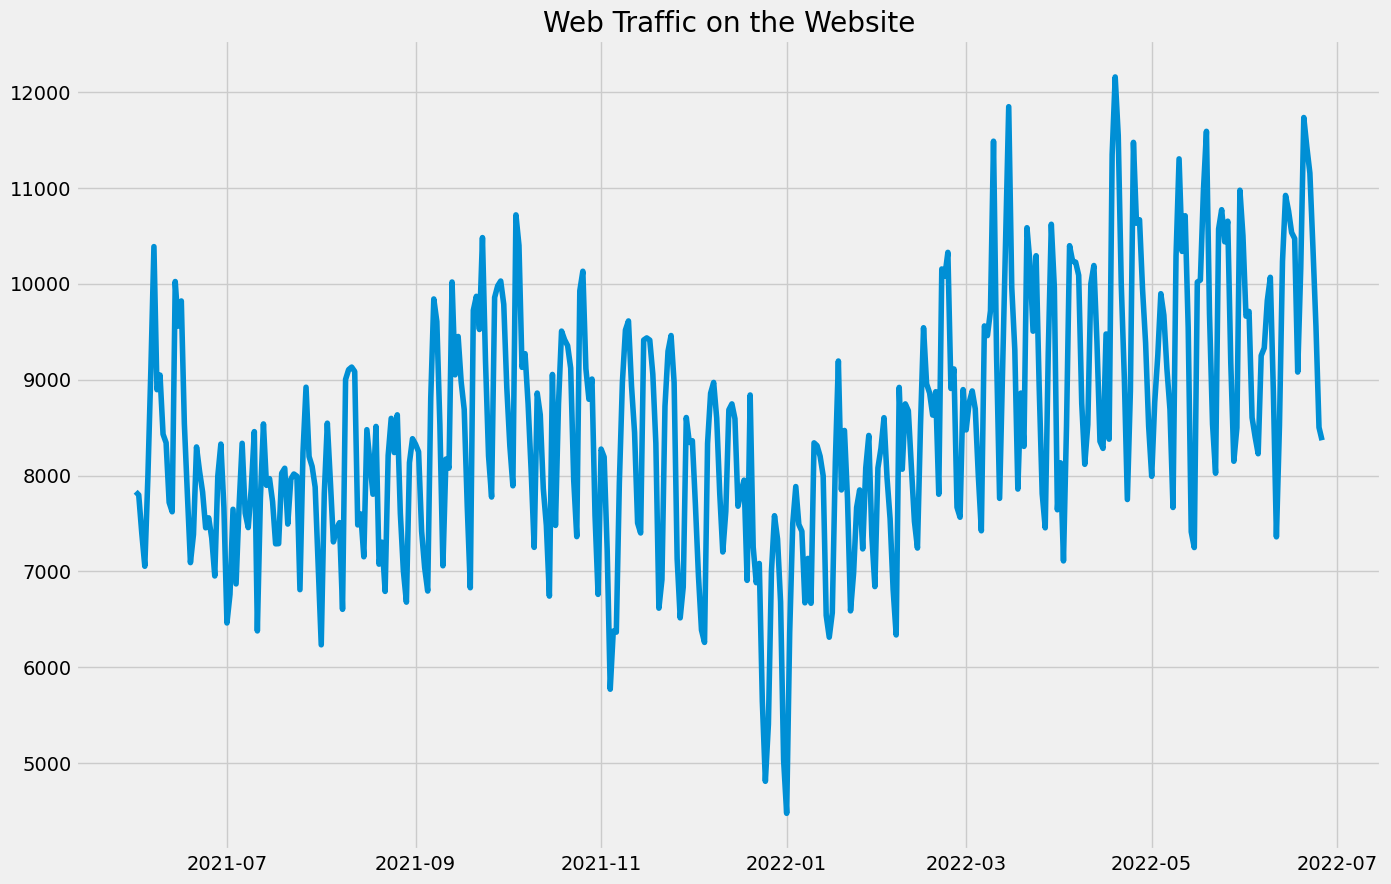

In [10]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15,10))
plt.plot(data["Date"], data["Views"])
plt.title("Web Traffic on the Website")
plt.show()

<Figure size 640x480 with 0 Axes>

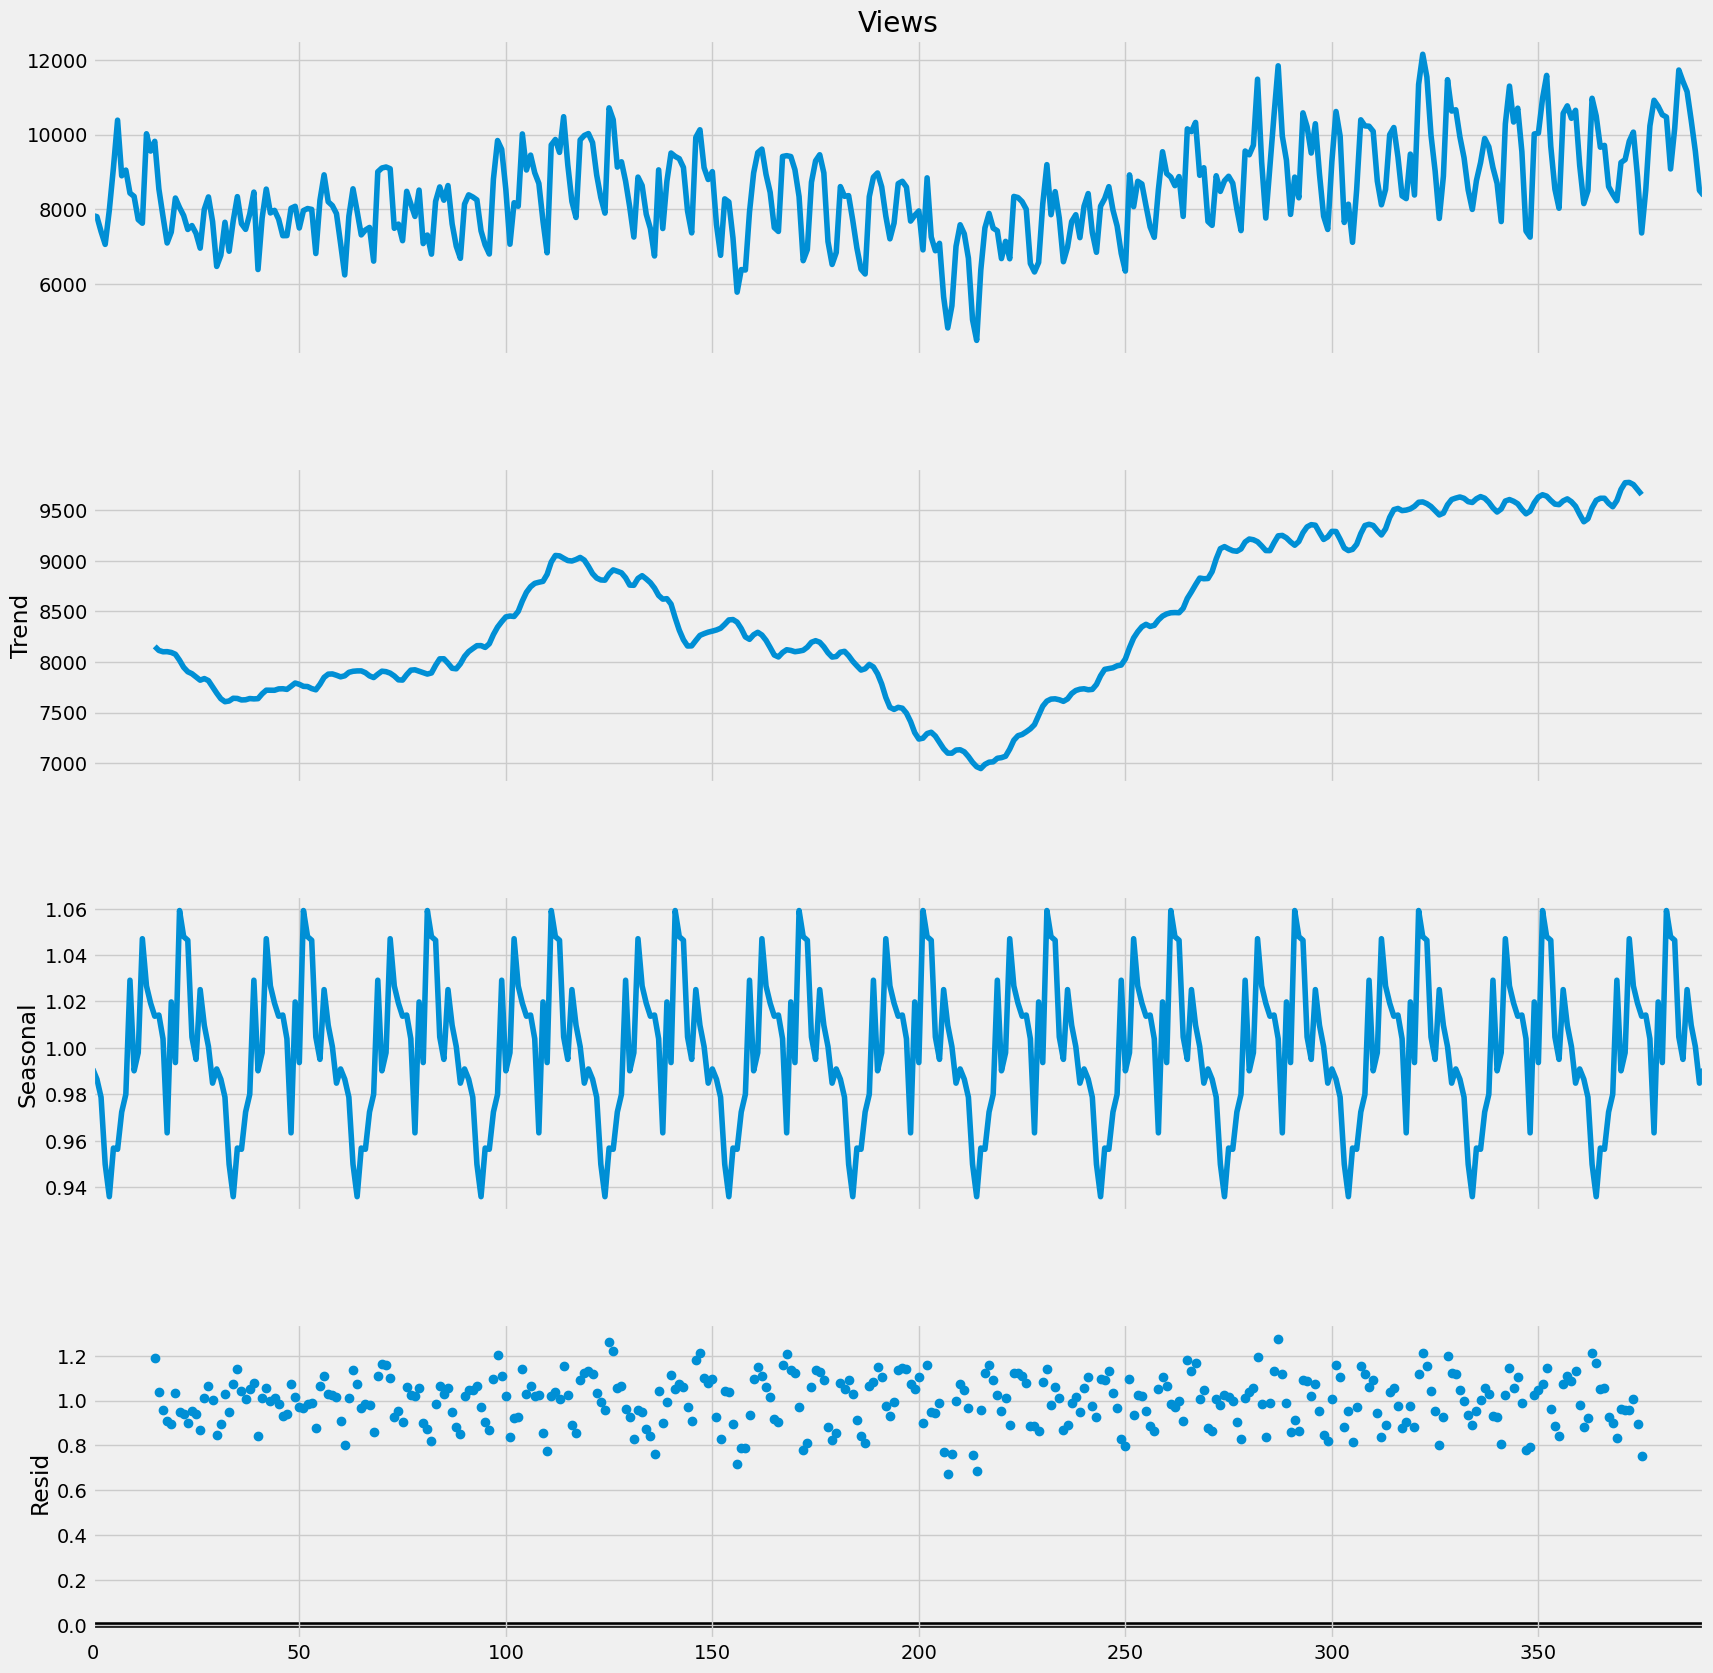

In [11]:
result = seasonal_decompose(data["Views"], 
                            model='multiplicative', 
                            period = 30)
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(20, 20)

<AxesSubplot: xlabel='Lag', ylabel='Autocorrelation'>

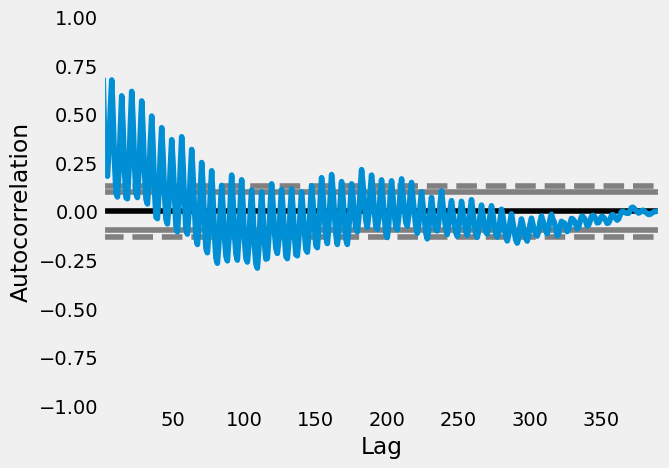

In [12]:
pd.plotting.autocorrelation_plot(data["Views"])

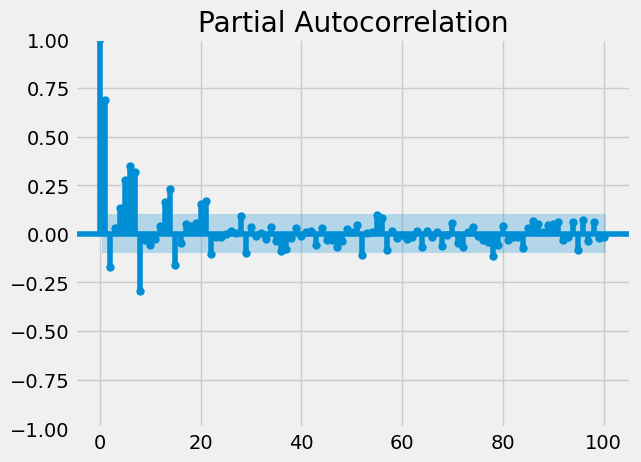

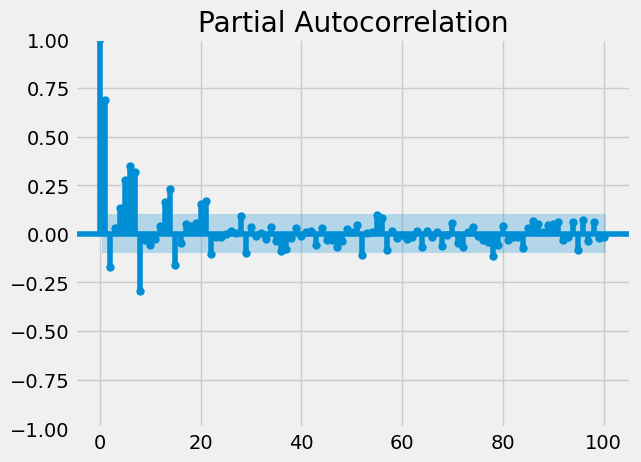

In [13]:
plot_pacf(data["Views"], lags = 100)

In [14]:
p, d, q = 5, 1, 2
model=sm.tsa.statespace.SARIMAX(data['Views'],
                                order=(p, d, q),
                                seasonal_order=(p, d, q, 12))
model=model.fit()
print(model.summary())

/home/somu/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           15     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.26940D+00    |proj g|=  5.28062D-01


 This problem is unconstrained.



At iterate    5    f=  8.06764D+00    |proj g|=  4.51780D-02

At iterate   10    f=  8.01428D+00    |proj g|=  4.59156D-02

At iterate   15    f=  7.98073D+00    |proj g|=  1.14090D-01

At iterate   20    f=  7.96097D+00    |proj g|=  1.73117D-02

At iterate   25    f=  7.95078D+00    |proj g|=  2.22026D-01

At iterate   30    f=  7.94314D+00    |proj g|=  1.85887D-01

At iterate   35    f=  7.93774D+00    |proj g|=  1.40793D-02

At iterate   40    f=  7.93366D+00    |proj g|=  3.10469D-02

At iterate   45    f=  7.93014D+00    |proj g|=  1.58047D-01

At iterate   50    f=  7.92560D+00    |proj g|=  1.49743D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/home/somu/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                              Views   No. Observations:                  391
Model:             SARIMAX(5, 1, 2)x(5, 1, 2, 12)   Log Likelihood               -3098.911
Date:                            Thu, 08 Feb 2024   AIC                           6227.821
Time:                                    23:27:33   BIC                           6286.845
Sample:                                         0   HQIC                          6251.247
                                            - 391                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7601      0.130      5.867      0.000       0.506       1.014
ar.L2         -0.7788      0.135   

In [15]:
predictions = model.predict(len(data), len(data)+100)
print(predictions)

391     9917.925955
392    10805.343259
393    10773.609496
394     9872.845208
395     8810.587293
           ...     
487     9515.204693
488     9857.625150
489    10754.333955
490    11148.722358
491    11069.144662
Name: predicted_mean, Length: 101, dtype: float64


<AxesSubplot: >

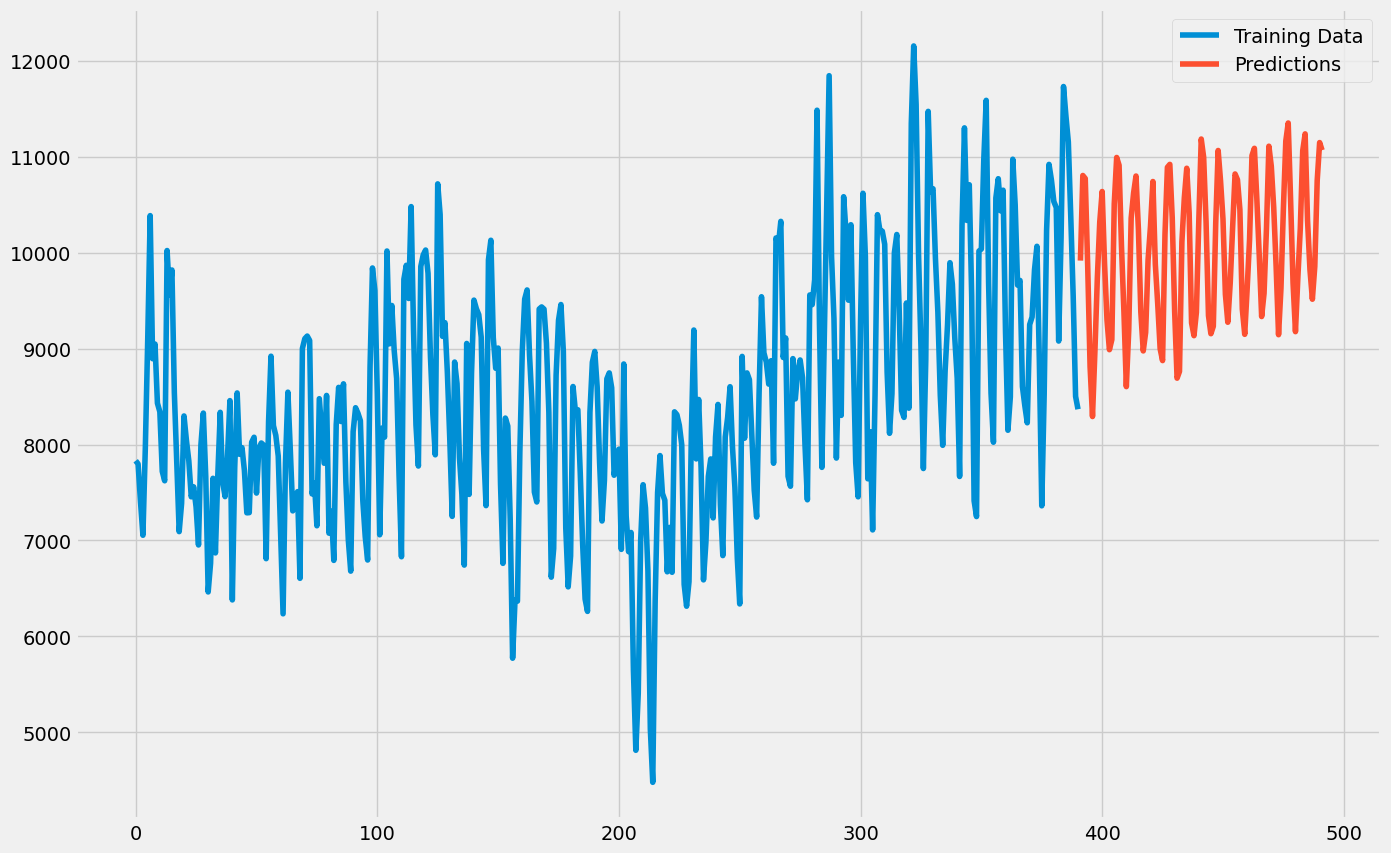

In [16]:
data["Views"].plot(legend=True, 
                   label="Training Data", 
                   figsize=(15, 10))
predictions.plot(legend=True, label="Predictions")